In [143]:
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
import numpy as np
import pylab as plt
%matplotlib inline
import scipy.stats
import matplotlib.gridspec as gridspec
from scipy.stats import gaussian_kde
import multiprocessing
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
import numpy.ma as ma
from readSent import *
from collections import Counter
import cPickle as pkl
from scipy import optimize
from functools import partial
import scipy.ndimage as ndimage
import numpy as np
import scipy
from scipy import signal
import scipy.stats
import tifffile as tiff
import glob
from scipy.ndimage.morphology import binary_dilation as bd
from nicer_plot import *

In [144]:
plot_config()

/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [50]:
fname = 'swhsolb12_modis'
data = parallel_rw_pkl(None,fname , 'r')

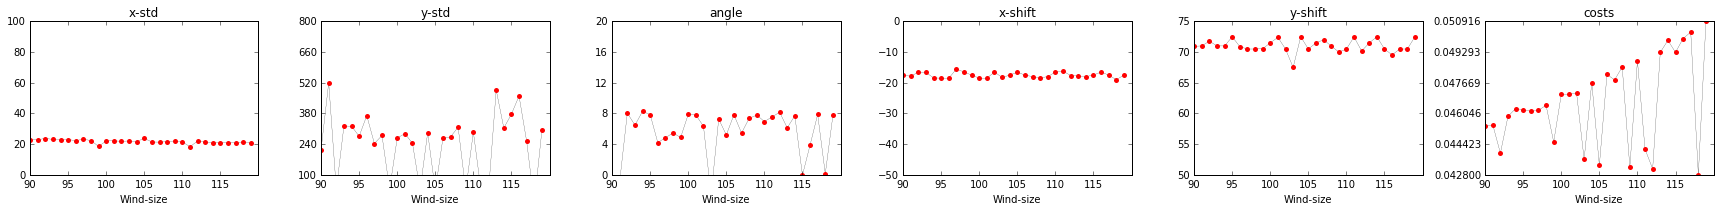

In [55]:
sps = 1
fig = plt.figure(figsize=(24,3))
titles = 'x-std','y-std','angle','x-shift', 'y-shift', 'costs'
x_tick = range(90,120, 5)
x_ax = range(90,120,1)

for ii, fname in enumerate(['re/swhsolb12_modis2',]):
    
    data = parallel_rw_pkl(None,fname , 'r')
    paras=[]
    costs=[]
    for iii in data:
        paras.append(iii[0])
        costs.append(iii[1])
    paras = np.array(paras)
    bounds = [[0,100],[100,800], [0,20], [-50,0], [50,75],[min(costs), max(costs)]]
    for i,j in enumerate(paras.T):
        if i ==3:
            ax = fig.add_subplot(sps,6,ii*6+i+1)
            ax.plot(x_ax,j,color='k', 
                          marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            ax.set_ylim(bounds[i][0],bounds[i][1])
            ax.set_title(titles[i])
            ax.set_xlabel('Wind-size')
            ax.set_xticks(x_tick)
            ax.set_yticks(np.arange(bounds[i][0],bounds[i][1]+1, (bounds[i][1]-bounds[i][0])/5.))
        elif i==1:
            ax = fig.add_subplot(sps,6,ii*6+i+1)
            ax.plot(x_ax,j,color='k', 
                          marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            ax.set_ylim(bounds[i][0],bounds[i][1])
            ax.set_title(titles[i])
            ax.set_xlabel('Wind-size')
            ax.set_xticks(x_tick)
            ax.set_yticks(np.arange(bounds[i][0],bounds[i][1]+1, (bounds[i][1]-bounds[i][0])/5.))
        elif i==0:
            ax = fig.add_subplot(sps,6,ii*6+i+1)
            ax.plot(x_ax,j,color='k', 
                          marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            ax.set_ylim(bounds[i][0],bounds[i][1])
            ax.set_title(titles[i])
            ax.set_xlabel('Wind-size')
            ax.set_xticks(x_tick)
            ax.set_yticks(np.arange(bounds[i][0],bounds[i][1]+1, (bounds[i][1]-bounds[i][0])/5.))
        elif i==2:
            ax = fig.add_subplot(sps,6,ii*6+i+1)
            ax.plot(x_ax,j,color='k', 
                          marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            ax.set_ylim(bounds[i][0],bounds[i][1])
            ax.set_title(titles[i])
            ax.set_xlabel('Wind-size')
            ax.set_xticks(x_tick)
            ax.set_yticks(np.arange(bounds[i][0],bounds[i][1]+1, (bounds[i][1]-bounds[i][0])/5.))
        elif i ==4:
            ax = fig.add_subplot(sps,6,ii*6+i+1)
            ax.plot(x_ax,j,color='k', 
                          marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            ax.set_ylim(bounds[i][0],bounds[i][1])
            ax.set_title(titles[i])
            ax.set_xlabel('Wind-size')
            ax.set_xticks(x_tick)
            ax.set_yticks(np.arange(bounds[i][0],bounds[i][1]+1, (bounds[i][1]-bounds[i][0])/5.))
            ax = fig.add_subplot(sps,6,ii*6+i+2)
            ax.plot(x_ax,costs,color='k', 
                              marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0)
            ax.set_ylim(bounds[i+1][0],bounds[i+1][1])
            ax.set_title(titles[i+1])
            ax.set_xlabel('Wind-size')
            ax.set_xticks(x_tick)
            ax.set_yticks(np.linspace(bounds[i+1][0],bounds[i+1][1], num=6))
    plt.tight_layout()

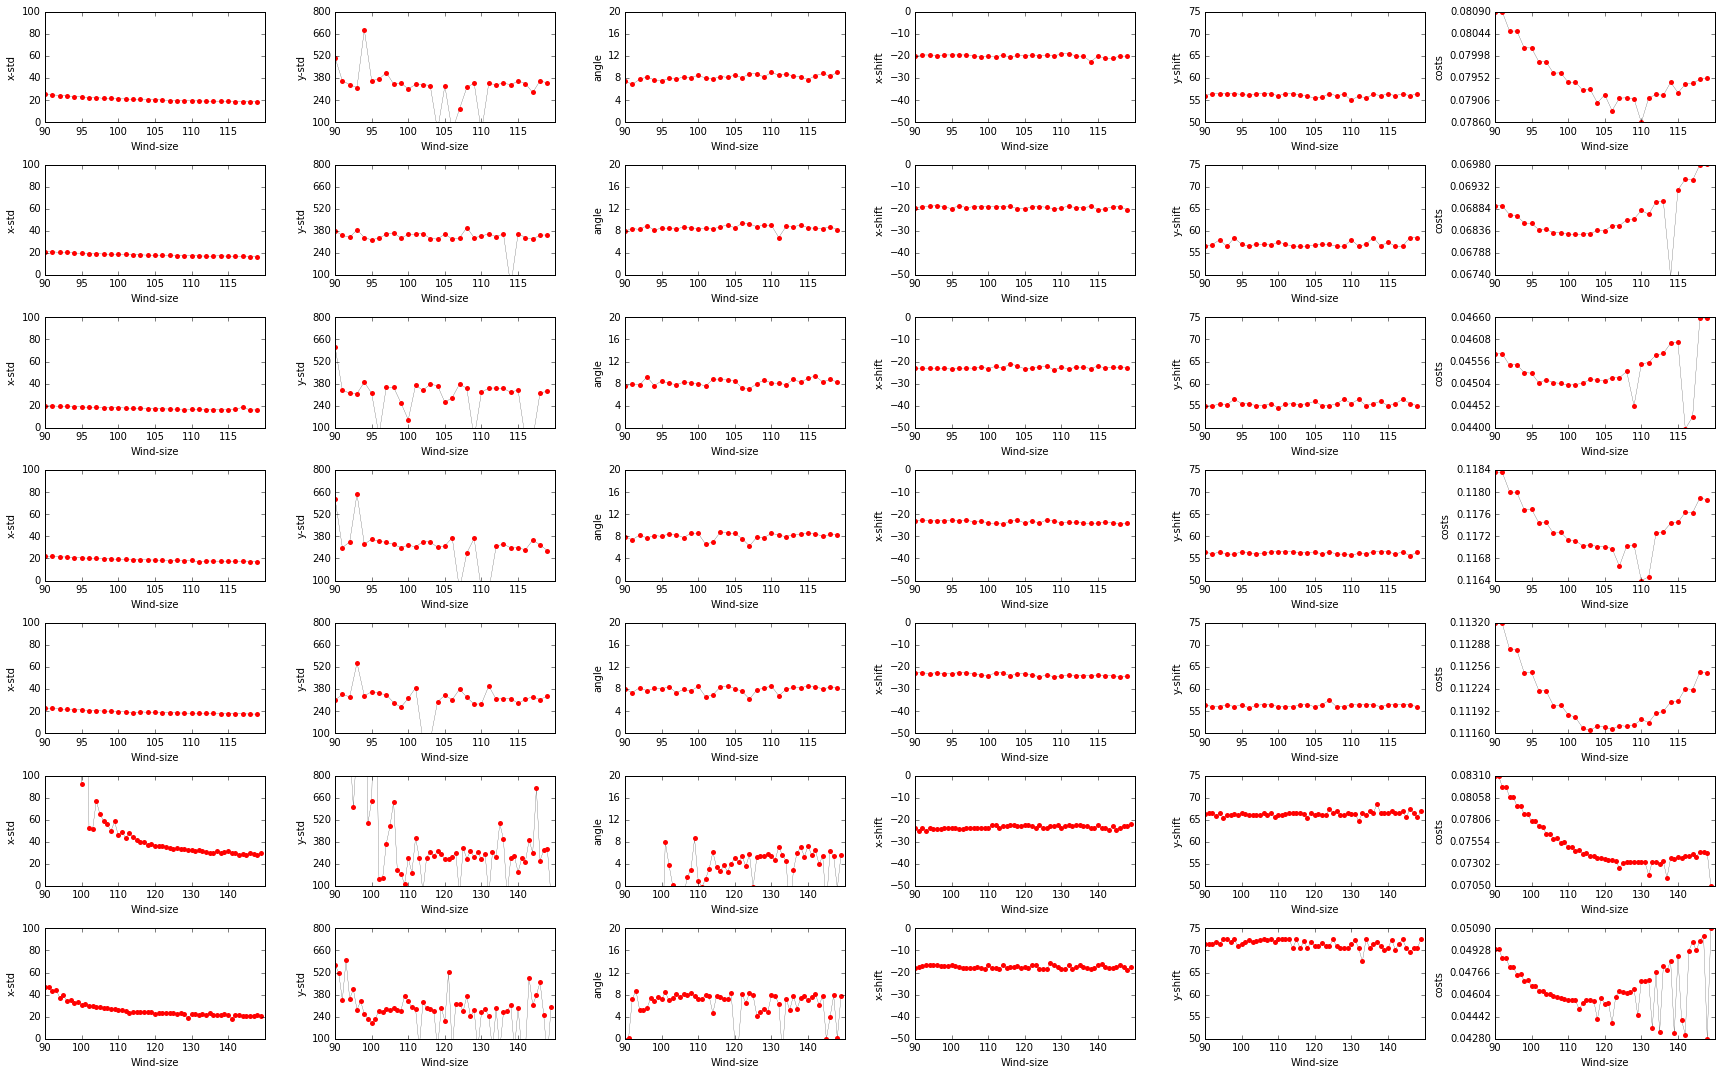

In [66]:
sps = 7
fig = plt.figure(figsize=(24,15))
labels = 'x-std','y-std','angle','x-shift', 'y-shift', 'costs'

for ii, fname in enumerate(['swhsolb2_modis','swhsolb3_modis','swhsolb4_modis','swhsolb8_modis','swhsolb8a_modis', 'swhsolb11_modis','swhsolb12_modis']):
    
    x_tick = range(90,120, 5)
    x_ax = range(90,120,1)
    
    data = parallel_rw_pkl(None,fname , 'r')
    paras=[]
    costs=[]
    for iii in data:
        paras.append(iii[0])
        costs.append(iii[1])
    if ii == 6:
        data = parallel_rw_pkl(None,'re/swhsolb12_modis2', 'r')
        for iii in data:
            paras.append(iii[0])
            costs.append(iii[1])
            x_tick = range(90,150, 10)
            x_ax = range(90,150,1)
    
    if ii == 5:
        data = parallel_rw_pkl(None,'re/swhsolb11_modis2', 'r')
        for iii in data:
            paras.append(iii[0])
            costs.append(iii[1])
            x_tick = range(90,150, 10)
            x_ax = range(90,150,1)
    
    paras = np.array(paras)
    bounds = [[0,100],[100,800], [0,20], [-50,0], [50,75],[round(min(costs),4), round(max(costs),4)]]
    for i,j in enumerate(paras.T):
        if i ==3:
            ax = fig.add_subplot(sps,6,ii*6+i+1)
            ax.plot(x_ax,j,color='k', 
                          marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            ax.set_ylim(bounds[i][0],bounds[i][1])
            ax.set_ylabel(labels[i])
            ax.set_xlabel('Wind-size')
            ax.set_xticks(x_tick)
            ax.set_yticks(np.arange(bounds[i][0],bounds[i][1]+1, (bounds[i][1]-bounds[i][0])/5.))
        elif i==1:
            ax = fig.add_subplot(sps,6,ii*6+i+1)
            ax.plot(x_ax,j,color='k', 
                          marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            ax.set_ylim(bounds[i][0],bounds[i][1])
            ax.set_ylabel(labels[i])
            ax.set_xlabel('Wind-size')
            ax.set_xticks(x_tick)
            ax.set_yticks(np.arange(bounds[i][0],bounds[i][1]+1, (bounds[i][1]-bounds[i][0])/5.))
        elif i==0:
            ax = fig.add_subplot(sps,6,ii*6+i+1)
            ax.plot(x_ax,j,color='k', 
                          marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            ax.set_ylim(bounds[i][0],bounds[i][1])
            ax.set_ylabel(labels[i])
            ax.set_xlabel('Wind-size')
            ax.set_xticks(x_tick)
            ax.set_yticks(np.arange(bounds[i][0],bounds[i][1]+1, (bounds[i][1]-bounds[i][0])/5.))
        elif i==2:
            ax = fig.add_subplot(sps,6,ii*6+i+1)
            ax.plot(x_ax,j,color='k', 
                          marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            ax.set_ylim(bounds[i][0],bounds[i][1])
            ax.set_ylabel(labels[i])
            ax.set_xlabel('Wind-size')
            ax.set_xticks(x_tick)
            ax.set_yticks(np.arange(bounds[i][0],bounds[i][1]+1, (bounds[i][1]-bounds[i][0])/5.))
        elif i ==4:
            ax = fig.add_subplot(sps,6,ii*6+i+1)
            ax.plot(x_ax,j,color='k', 
                          marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            ax.set_ylim(bounds[i][0],bounds[i][1])
            ax.set_ylabel(labels[i])
            ax.set_xlabel('Wind-size')
            ax.set_xticks(x_tick)
            ax.set_yticks(np.arange(bounds[i][0],bounds[i][1]+1, (bounds[i][1]-bounds[i][0])/5.))
            ax = fig.add_subplot(sps,6,ii*6+i+2)
            ax.plot(x_ax,costs,color='k', 
                              marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0)
            ax.set_ylim(bounds[i+1][0],bounds[i+1][1])
            ax.set_ylabel(labels[i+1])
            ax.set_xlabel('Wind-size')
            ax.set_xticks(x_tick)
            ax.set_yticks(np.linspace(bounds[i+1][0],bounds[i+1][1], num=6))
    plt.tight_layout()

In [71]:
70/120.

0.5833333333333334

In [69]:
65/130.

0.5

In [72]:
55/103.

0.5339805825242718

In [74]:
55/100.

0.55

In [75]:
56/103.

0.5436893203883495

In [118]:
para=[]
for ii, fname in enumerate(['swhsolb2_modis','swhsolb3_modis','swhsolb4_modis','swhsolb8_modis','swhsolb8a_modis', 'swhsolb11_modis','swhsolb12_modis']):
    data = parallel_rw_pkl(None,fname , 'r')
    costs=[]
    paras = []
    for iii in data:
        paras.append(iii[0])
        costs.append(iii[1])
    if ii == 6:
        data = parallel_rw_pkl(None,'re/swhsolb12_modis2', 'r')
        for iii in data:
            paras.append(iii[0])
            costs.append(iii[1])
    if ii == 5:
        data = parallel_rw_pkl(None,'re/swhsolb11_modis2', 'r')
        for iii in data:
            paras.append(iii[0])
            costs.append(iii[1])
    para.append(paras)

In [200]:
mincost = (18,25), (7, 15), (11,17), (13,21), (13,19), (35,45), (20,30)

In [201]:
np.array(para[0][15:25]).shape

(10, 5)

In [213]:
pas = []
winds = []
for i in range(7):
    mi,ma = mincost[i]
    winds.append(range(90, 150)[mi:ma])
    da = para[i][mi:ma]
    pas.append(da)

In [216]:
winds

[[108, 109, 110, 111, 112, 113, 114],
 [97, 98, 99, 100, 101, 102, 103, 104],
 [101, 102, 103, 104, 105, 106],
 [103, 104, 105, 106, 107, 108, 109, 110],
 [103, 104, 105, 106, 107, 108],
 [125, 126, 127, 128, 129, 130, 131, 132, 133, 134],
 [110, 111, 112, 113, 114, 115, 116, 117, 118, 119]]

In [221]:
winds = np.array([int(np.mean(i)) for i in winds])

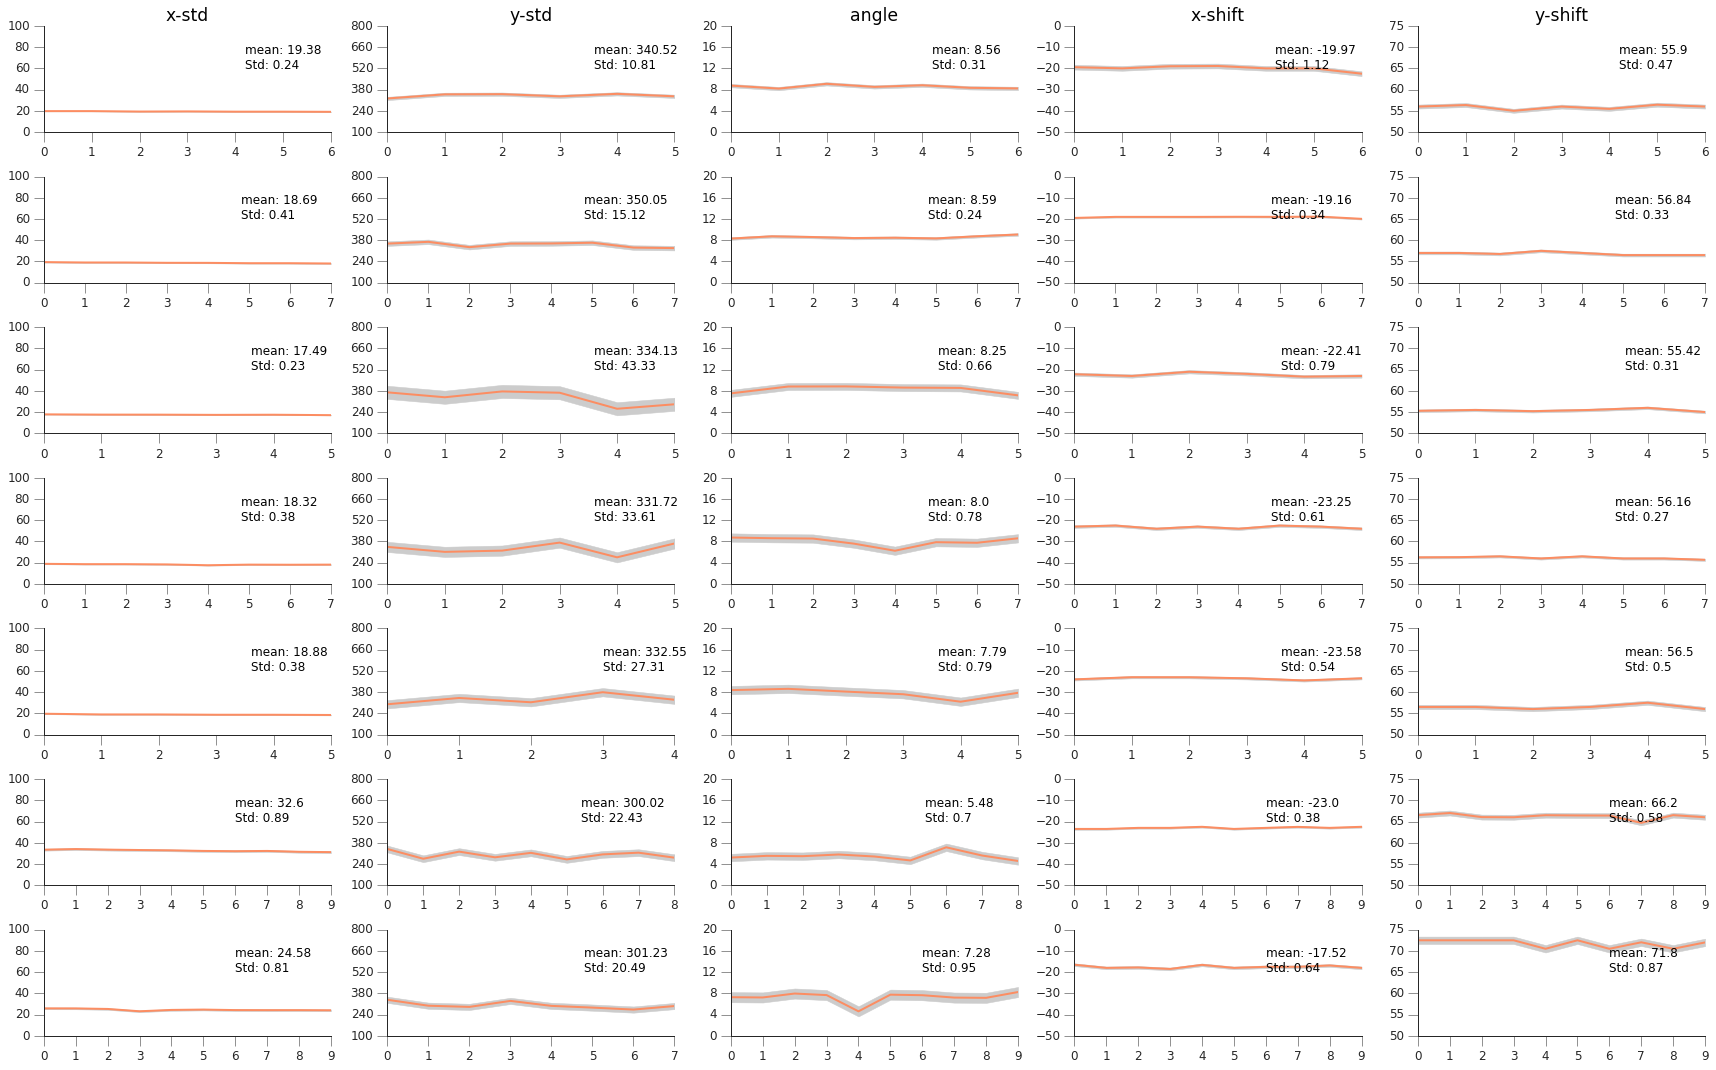

In [256]:
fig = plt.figure(figsize=(24,15))
bounds = [[0,100],[100,800], [0,20], [-50,0], [50,75]]
labels = 'x-std','y-std','angle','x-shift', 'y-shift', 'costs'
op_paras = []
for i in range(7):
    ps = []
    for j in range(5):
        num = (i*5)+(j+1)
        ax = fig.add_subplot(7,5,num)
        data = np.array(pas[i]).T[j]
        low, high =  bounds[j][0],bounds[j][1]
        to_plot = data[(data>low)&(data<high)]
        ax.plot(to_plot)
        pretty_axes(ax)
        ax.set_ylim(bounds[j][0],bounds[j][1])
        #print low, high
        ax.set_yticks(range(low, high+1, (high-low)/5))
        ax.set_xticks(range(len(to_plot)))
        plt.tight_layout()
        plt.fill_between(range(len(to_plot)),(to_plot)-np.std(to_plot),(to_plot+np.std(to_plot)), color="0.8")
        ps.append(np.mean(to_plot))
        if i ==0:
            plt.title(labels[j])
        plt.text(len(to_plot)*0.6, (high-low)*0.6+low, 'mean: %s'%round(np.mean(to_plot),2)+ '\n'+'Std: %s'%round(np.std(to_plot),2))
    op_paras.append(ps)
    plt.tight_layout()

In [248]:
plt.fill_between?

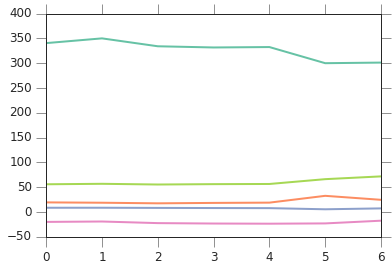

In [210]:
plt.plot(np.array(op_paras))

In [224]:
np.array(op_paras).T[1]/(winds)

array([ 3.06770894,  3.50054393,  3.24397976,  3.12940721,  3.1671861 ,
        2.3257417 ,  2.64235972])

In [240]:
psfs = np.array(op_paras).T.tolist()+[winds.tolist()]

In [243]:
np.array(psfs).T

array([[  19.37742268,  340.51569258,    8.55957284,  -19.97494662,
          55.8951623 ,  111.        ],
       [  18.69004701,  350.05439333,    8.58614512,  -19.15739279,
          56.84465371,  100.        ],
       [  17.49415378,  334.1299149 ,    8.24946071,  -22.41469548,
          55.41919643,  103.        ],
       [  18.32483114,  331.71716459,    7.99687234,  -23.25150309,
          56.15568971,  106.        ],
       [  18.87672752,  332.5545401 ,    7.78991191,  -23.5804287 ,
          56.49932225,  105.        ],
       [  32.60327561,  300.02067928,    5.4806016 ,  -23.00220077,
          66.20249948,  129.        ],
       [  24.57625059,  301.22900811,    7.27638375,  -17.52262047,
          71.8024419 ,  114.        ]])